In [2]:
import pandas as pd

# Load your dataset, explicitly setting 'dtype' for 'full_text' to ensure it's treated as a string
df = pd.read_csv('/content/aes_dataset_2.csv', dtype={'full_text': str})
df

,essay_id,full_text,score
0,7B6440A3F279,In my opinion i do agree with saying student's...,3
1,E4306421A388,Students nowadays are being more drawn to tech...,6
2,NaN,"In the article ""Making Mona Lisa Smile"" the au...",6
3,F1CE49620429,"Dear Senator,\n\nThe Electoral College should ...",4
4,32926CBD644F,It is August 5th and my friend Generic_Name ca...,6
...,...,...,...
11995,54ECEEDEB966,dear principal i believe students should be ab...,3
11996,0778075,Have you ever thought what venus could actuall...,2
11997,47B770CB6B51,Online classes are a wonder of the 21st centur...,5
11998,97A6E516249D,As the world has recently entered the era of t...,6


In [3]:
import pandas as pd

# Load your dataset, explicitly setting 'dtype' for 'full_text' to ensure it's treated as a string
df = pd.read_csv('/content/aes_dataset_2.csv', dtype={'full_text': str})

# Drop the 'essay_id' column as it's no longer needed
df.drop(columns='essay_id', inplace=True)

# Calculate word count for each essay and add it to the DataFrame
df['word_count'] = df['full_text'].apply(lambda x: len(x.split()))

# Add a new column 'new_essay_id' that assigns a unique number to each essay from 1 to the length of the DataFrame
df['new_essay_id'] = range(1, len(df) + 1)

# Rearrange the columns to have 'new_essay_id', 'full_text', 'score', and 'word_count' in the specified order
df = df[['new_essay_id', 'full_text', 'score', 'word_count']]

# Save the changes back to a CSV file if needed
df.to_csv('aes_dataset_modified.csv', index=False)

# Display the first few rows to verify the new structure
df

,new_essay_id,full_text,score,word_count
0,1,In my opinion i do agree with saying student's...,3,469
1,2,Students nowadays are being more drawn to tech...,6,999
2,3,"In the article ""Making Mona Lisa Smile"" the au...",6,722
3,4,"Dear Senator,\n\nThe Electoral College should ...",4,392
4,5,It is August 5th and my friend Generic_Name ca...,6,1118
...,...,...,...,...
11995,11996,dear principal i believe students should be ab...,3,325
11996,11997,Have you ever thought what venus could actuall...,2,268
11997,11998,Online classes are a wonder of the 21st centur...,5,862
11998,11999,As the world has recently entered the era of t...,6,850


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   new_essay_id  12000 non-null  int64 
 1   full_text     12000 non-null  object
 2   score         12000 non-null  int64 
 3   word_count    12000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 375.1+ KB


In [5]:
df.describe()

,new_essay_id,score,word_count
count,12000.00000,12000.000000,12000.000000
mean,6000.50000,3.500000,465.332833
std,3464.24595,1.707896,235.660676
min,1.00000,1.000000,143.000000
25%,3000.75000,2.000000,263.000000
50%,6000.50000,3.500000,422.000000
75%,9000.25000,5.000000,627.000000
max,12000.00000,6.000000,1367.000000


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import random
import re

# Ensure NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def process_chunk(df):
    # Data Cleansing: Replace missing 'full_text' with a placeholder
    df['full_text'] = df['full_text'].fillna('No text provided')

    # Function to expand contractions
    contractions_dict = {"can't": "cannot", "won't": "will not", "n't": " not"}  # Add more as needed
    def expand_contractions(text):
        for contraction, full_form in contractions_dict.items():
            text = re.sub(contraction, full_form, text)
        return text

    # Text Normalization: Define a function to normalize text
    def normalize_text(text):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
        text = expand_contractions(text)  # Expand contractions
        tokens = word_tokenize(text)  # Tokenize
        stop_words = set(stopwords.words('english'))
        words = [word for word in tokens if word.isalpha() and word not in stop_words]
        return ' '.join(words)

    # Apply text normalization
    df['normalized_text'] = df['full_text'].apply(normalize_text)

    # Lemmatization: Apply lemmatization
    def apply_lemmatization(text):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    df['lemmatized_text'] = df['normalized_text'].apply(apply_lemmatization)

    # Stemming: Apply stemming
    def apply_stemming(text):
        return ' '.join([stemmer.stem(word) for word in text.split()])

    df['processed_text'] = df['lemmatized_text'].apply(apply_stemming)

    # Advanced Augmentation Techniques
    def synonym_replacement(text, n=1):
        words = word_tokenize(text)
        new_words = words.copy()
        random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
        random.shuffle(random_word_list)
        num_replaced = 0
        for random_word in random_word_list:
            synonyms = get_synonyms(random_word)
            if len(synonyms) >= 1:
                synonym = random.choice(synonyms)
                new_words = [synonym if word == random_word else word for word in new_words]
                num_replaced += 1
            if num_replaced >= n:
                break
        return ' '.join(new_words)

    def get_synonyms(word):
        synonyms = []
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonym = lemma.name()
                if synonym != word:
                    synonyms.append(synonym)
        return synonyms

    def random_insertion(text, n=1):
        words = word_tokenize(text)
        new_words = words.copy()
        for _ in range(n):
            add_word(new_words)
        return ' '.join(new_words)

    def add_word(new_words):
        synonyms = []
        counter = 0
        while len(synonyms) < 1:
            random_word = new_words[random.randint(0, len(new_words)-1)]
            synonyms = get_synonyms(random_word)
            counter += 1
            if counter >= 10:
                return
        random_synonym = synonyms[0]
        random_idx = random.randint(0, len(new_words)-1)
        new_words.insert(random_idx, random_synonym)

    def random_deletion(text, p=0.2):
        words = word_tokenize(text)
        if len(words) == 1:
            return words
        new_words = []
        for word in words:
            if random.uniform(0, 1) > p:
                new_words.append(word)
        if len(new_words) == 0:
            return [words[random.randint(0, len(words)-1)]]
        return ' '.join(new_words)

    def random_swap(text, n=1):
        words = word_tokenize(text)
        new_words = words.copy()
        for _ in range(n):
            new_words = swap_word(new_words)
        return ' '.join(new_words)

    def swap_word(new_words):
        random_idx_1 = random.randint(0, len(new_words)-1)
        random_idx_2 = random_idx_1
        counter = 0
        while random_idx_2 == random_idx_1:
            random_idx_2 = random.randint(0, len(new_words)-1)
            counter += 1
            if counter > 3:
                return new_words
        new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
        return new_words

    # Apply data augmentation
    df['processed_text'] = df['processed_text'].apply(synonym_replacement)
    df['processed_text'] = df['processed_text'].apply(random_insertion)
    df['processed_text'] = df['processed_text'].apply(random_deletion)
    df['processed_text'] = df['processed_text'].apply(random_swap)

    # Remove intermediate columns if not needed
    df.drop(columns=['normalized_text', 'lemmatized_text'], inplace=True)

    return df

# Specify the file path
file_path = 'aes_dataset_modified.csv'

# Read and process the dataset in chunks
chunk_size = 500  # Adjust based on system capabilities
reader = pd.read_csv(file_path, chunksize=chunk_size)

# Initialize a variable to check for the first chunk
first_chunk = True

# Process each chunk and append it to the processed_dataset.csv
for chunk in reader:
    processed_chunk = process_chunk(chunk)
    # Save processed chunk to CSV, manage headers for the first chunk
    processed_chunk.to_csv('processed_dataset.csv', mode='a', header=first_chunk, index=False)
    first_chunk = False  # Only write the header for the first chunk

print("Processing complete. Data saved to 'processed_dataset.csv'.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Processing complete. Data saved to 'processed_dataset.csv'.


In [7]:
import pandas as pd
# Attempt to load the dataset with a specified delimiter
# Replace 'delimiter_here' with ',', ';', '\t', etc., as appropriate for your file.
df = pd.read_csv('/content/processed_dataset.csv', delimiter='\t', encoding='utf-8')

# Check the first few rows and the column structure again
print(df.head())
print(df.columns)

  new_essay_id,full_text,score,word_count,processed_text
0  1,"In my opinion i do agree with saying studen...    
1  You principal said all student's should have t...    
2  When they say you have to do a extracurricular...    
3  When you have student's doing extracurricular ...    
4  Therefore when school says you have to attend ...    
Index(['new_essay_id,full_text,score,word_count,processed_text'], dtype='object')


In [11]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score
import numpy as np
from torch.utils.data import Dataset
from transformers import get_linear_schedule_with_warmup
from nltk.tokenize import word_tokenize
import random

# Load the dataset
df = pd.read_csv('/content/processed_dataset.csv')

# Data Augmentation
def synonym_replacement(text, n=2):
    # This is a placeholder. In practice, you'd use a synonym dictionary or word embeddings
    words = word_tokenize(text)
    new_words = words.copy()
    for _ in range(n):
        idx = random.randint(0, len(words) - 1)
        new_words[idx] = f"SYN_{words[idx]}"  # Placeholder for synonym
    return ' '.join(new_words)

def augment_data(texts, labels, augment_factor=1):
    augmented_texts = []
    augmented_labels = []
    for text, label in zip(texts, labels):
        augmented_texts.append(text)
        augmented_labels.append(label)
        for _ in range(augment_factor):
            augmented_text = synonym_replacement(text)
            augmented_texts.append(augmented_text)
            augmented_labels.append(label)
    return augmented_texts, augmented_labels

# Split and augment data
X = df['processed_text']
Y = df['score']
train_texts, val_texts, train_scores, val_scores = train_test_split(X, Y, test_size=0.2, random_state=42)
train_texts, train_scores = augment_data(train_texts, train_scores, augment_factor=1)

# Tokenizer and model initialization
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

def tokenize_data(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=256, return_tensors='pt')

train_encodings = tokenize_data(train_texts)
# Convert val_texts Series to a list of strings
val_encodings = tokenize_data(val_texts.tolist())
train_labels = torch.tensor([score - 1 for score in train_scores], dtype=torch.long)
val_labels = torch.tensor(val_scores.values - 1, dtype=torch.long)

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
val_dataset = CustomDataset(val_encodings, val_labels)

# Calculate class weights
class_counts = pd.Series(train_labels).value_counts().sort_index()
class_weights = torch.tensor([class_counts.sum() / class_counts[i] for i in range(len(class_counts))], dtype=torch.float)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = class_weights.to(device)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    cohen_kappa = cohen_kappa_score(labels, preds)
    quadratic_kappa = cohen_kappa_score(labels, preds, weights='quadratic')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cohen_kappa': cohen_kappa,
        'quadratic_kappa': quadratic_kappa
    }

# Hyperparameter tuning
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,  # Increased epochs
    per_device_train_batch_size=8,  # Increased batch size
    per_device_eval_batch_size=8,
    warmup_steps=1000,  # Increased warmup steps
    weight_decay=0.02,  # Slightly increased weight decay
    logging_dir='./logs',
    logging_steps=50,
    evaluation_strategy='steps',
    eval_steps=500,  # Evaluate more frequently
    save_strategy='steps',
    save_steps=500,
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy',
    gradient_accumulation_steps=2,
    learning_rate=3e-5,  # Slightly increased learning rate
    fp16=True,
    max_grad_norm=1.0,  # Added gradient clipping
)

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").to(device)
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

    def create_optimizer_and_scheduler(self, num_training_steps):
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.args.learning_rate, weight_decay=self.args.weight_decay)
        self.lr_scheduler = get_linear_schedule_with_warmup(
            self.optimizer,
            num_warmup_steps=self.args.warmup_steps,
            num_training_steps=num_training_steps
        )

model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=6)
model = model.to(device)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

print("Training improved RoBERTa model")
trainer.train()

print("Evaluating improved RoBERTa model")
results = trainer.evaluate()
print(results)



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python

Training improved RoBERTa model


Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Cohen Kappa,Quadratic Kappa
500,1.205000,1.060853,0.536667,0.533441,0.536667,0.517863,0.444631,0.850697
1000,1.101100,1.007967,0.564583,0.575341,0.564583,0.562720,0.477361,0.859811
1500,0.889500,1.025199,0.570417,0.578085,0.570417,0.560935,0.485012,0.872747
2000,0.877000,0.893644,0.616667,0.610355,0.616667,0.611021,0.539940,0.910594
2500,0.638200,0.983814,0.601250,0.634654,0.601250,0.604562,0.521009,0.903574
3000,0.718400,0.902834,0.635833,0.633874,0.635833,0.633850,0.562896,0.911107
3500,0.610000,0.970510,0.612917,0.637360,0.612917,0.620067,0.535181,0.913622
4000,0.473300,1.078324,0.636667,0.649031,0.636667,0.639264,0.563926,0.916785
4500,0.427400,1.141720,0.639583,0.647796,0.639583,0.641441,0.567104,0.914169
5000,0.266700,1.325660,0.641250,0.649521,0.641250,0.639574,0.569239,0.918500


Evaluating improved RoBERTa model


{'eval_loss': 3.090731620788574, 'eval_accuracy': 0.6679166666666667, 'eval_precision': 0.6708850759306503, 'eval_recall': 0.6679166666666667, 'eval_f1': 0.6686958651164975, 'eval_cohen_kappa': 0.6014498491060125, 'eval_quadratic_kappa': 0.926154388762241, 'eval_runtime': 9.7347, 'eval_samples_per_second': 246.54, 'eval_steps_per_second': 30.817, 'epoch': 10.0}


score
3    2000
6    2000
4    2000
5    2000
1    2000
2    2000
Name: count, dtype: int64


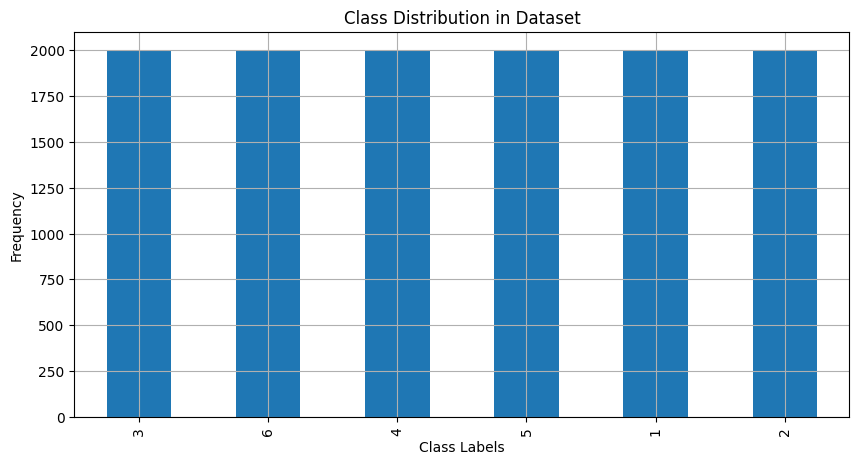

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/processed_dataset.csv')

# Count the number of instances in each class
class_distribution = df['score'].value_counts()

# Print the class distribution
print(class_distribution)

# Visualize the class distribution
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [39]:
# Evaluate the model
print("Evaluating RoBERTa model")
results = trainer.evaluate()
print(results)

# Save the model and tokenizer in separate directories
model_save_path = './saved_roberta_model'
tokenizer_save_path = './saved_roberta_tokenizer'

model.save_pretrained(model_save_path)
tokenizer.save_pretrained(tokenizer_save_path)

print(f"Model saved to {model_save_path}")
print(f"Tokenizer saved to {tokenizer_save_path}")


Evaluating RoBERTa model


{'eval_loss': 3.090731620788574, 'eval_accuracy': 0.6679166666666667, 'eval_precision': 0.6708850759306503, 'eval_recall': 0.6679166666666667, 'eval_f1': 0.6686958651164975, 'eval_cohen_kappa': 0.6014498491060125, 'eval_quadratic_kappa': 0.926154388762241, 'eval_runtime': 10.1734, 'eval_samples_per_second': 235.91, 'eval_steps_per_second': 29.489, 'epoch': 10.0}
Model saved to ./saved_roberta_model
Tokenizer saved to ./saved_roberta_tokenizer


In [40]:
# Save the model and tokenizer in separate directories
model_save_path = './saved_roberta_model'
tokenizer_save_path = './saved_roberta_tokenizer'

model.save_pretrained(model_save_path)
tokenizer.save_pretrained(tokenizer_save_path)

print(f"Model saved to {model_save_path}")
print(f"Tokenizer saved to {tokenizer_save_path}")



Model saved to ./saved_roberta_model
Tokenizer saved to ./saved_roberta_tokenizer


In [41]:
import shutil

# Zip the saved model directory
shutil.make_archive(model_save_path, 'zip', model_save_path)

# Zip the saved tokenizer directory
shutil.make_archive(tokenizer_save_path, 'zip', tokenizer_save_path)


'/content/saved_roberta_tokenizer.zip'

In [38]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import random

# Load the saved model and tokenizer
model_save_path = './saved_roberta_model'
tokenizer = RobertaTokenizer.from_pretrained(model_save_path)
model = RobertaForSequenceClassification.from_pretrained(model_save_path)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Preprocessing functions (as defined in your previous steps)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_and_augment(text):
    contractions_dict = {"can't": "cannot", "won't": "will not", "n't": " not"}
    for contraction, full_form in contractions_dict.items():
        text = re.sub(contraction, full_form, text)
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    stemmed_text = ' '.join([stemmer.stem(word) for word in lemmatized_tokens])
    return stemmed_text

# Tokenization function
def tokenize_essay(essay):
    inputs = tokenizer(essay, padding=True, truncation=True, max_length=256, return_tensors="pt")
    return inputs.to(device)

# Prediction function
def predict_score(essay):
    # Preprocess and augment the essay
    processed_essay = preprocess_and_augment(essay)

    # Tokenize the essay
    inputs = tokenize_essay(processed_essay)

    # Predict
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted score
    prediction = torch.argmax(outputs.logits, dim=1) + 1  # Adjust for score scale starting at 1
    return prediction.item()

# Example usage
new_essay = """A student is sitting in his seat alternating his facial expressions from a frown to a smile every other minute. The student is not necessarily happy, sad, or pocessing mixed emotions, but simply playing around and testing the new technolgy that has been placed in the classroom. New technology has been developed that can detect facial expressions. Dr. Hang predicts, "a classroom computer could recognize when a student is becoming bored." What he doesn't stop to think about is wether this technology would be distracting, or bring other negative effects to the students. The use of emotional expression reading technology is not valuable in a classroom because it can be a distraction, put forth false information leading to personal problems, and cause students to feel uncomfortable making them unable to learn.

First, the use of technology that can calculate facial expressions would be a distraction to the students and the teacher in a classroom. Technology such as telephones, iPods, and smart watches have been banned in the classroom at most schools. This is beacuse they are a distraction to learning. Imagine a high technical computer that monitors all of 44 major muscles of your face to decect the percent ratio of the six basic emotions: happiness, surprise, anger, disgust, fear, and sadness placed in a classroom of students from the ages five to eighteen. This would lead to a lot of distraction beacuse most students at this age would be curious of how it works, and if it works. Instead of listening to the lesson, the students would be messing around and trying out different facial expressions. This technology can also be distracting to the teacher beacuse they will have to be worrying about how their expressions are as well. They will be focusing on not looking negative, or being to harsh on the student since they are now being watched. This may ause them to not be as honest on feedback, and they may not be as focused on teaching.

Next, the technology in the classroom can put forth false information and casue personal problems. The technology can read, as previously mentioned the percent of how much anger, fear, and sadness you pocess. Many students at this age are going through a lot of changes and have many mixed emotions. For example, if the technology detects a particular student contains a large amount of sadness, fear, and anger for so many days, the student's parents should be notified because they could have emotional or mental issues. Though the technology seems very well designed, sometimes our facial expressions contradict our actual emotions. The technology can put forth false information of how we are feeling, and cause serious personal problems. Some people may believe the use of this technology in the classroom is beneficial becasue it monitors when students seem uniterested or bored, but a teacher can do such on their own, and all the many problems the technology gives is not worth it.

Finally, the technology can be a problem in the classroom beacuse it may cause students to feel uncomfortable. Many students struggle with their presentation skills at this age beacuse they may feel insecure or pressured, knowing that people are watching them. With this technolgy watching their every move and expression changes, it may cause them the same kind of pressure. This can lead them to not want to participate in class. In school the best way a teacher knows if you understand the material is if you ask questions, answer, and are involved. If this techology stops them from that, then it should not be in the classroom. In most schools, cameras are not allowed in the classroom, so that rule should be applied to this use of technology as well.

The use of emotional expression reading technology is not valuable in a classroom because it can be a distraction, malfunction and put forth false information, and cause students to feel uncomfortable making them unable to learn. In conclusion, the technology would bring a lot of problems to the students and teachers in the classroom. If there is only one good reason against many reasons not to have or do something then, it is usually not worth it. That rule applies here. Facial recogniotion technology should not be in a classroom beacuse it is uneccessary and brings neagtive effects to the students and teachers."""
predicted_score = predict_score(new_essay)
print(f"The predicted score for the essay is: {predicted_score}")


The predicted score for the essay is: 6


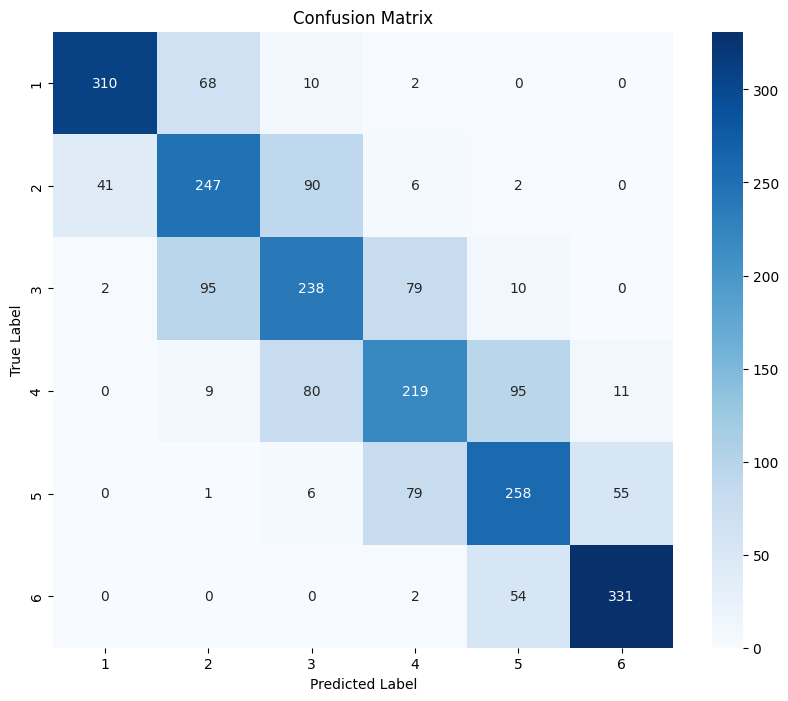

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have val_dataset and val_labels from the previous steps
# Predicting on the validation set to obtain confusion matrix data
val_preds_raw = trainer.predict(val_dataset)
val_preds = np.argmax(val_preds_raw.predictions, axis=1)
val_labels = val_labels.numpy()

# Compute confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
